# Evaluation Of Duet Benchmarking Results from Distributed Database "Cassandra"

### Imports

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
from pathlib import Path

### Import Benchmarking Measurements as csv file and create Pandas Dataframe for further Analysis

In [135]:
cwd = Path.cwd()
print(cwd)
filepath = os.path.join(cwd, "Results", "10_000ops_3t", "load_measurements.csv")
print(filepath)
df = pd.read_csv(filepath)

C:\Users\Felix Medicus\Desktop\Thesis_MCC\DuetBenchmarking\Results
C:\Users\Felix Medicus\Desktop\Thesis_MCC\DuetBenchmarking\Results\Results\200_000ops_3t\run_measurements.csv


### Insert latencies in ms into the measurement table

In [136]:
df["latency_ms"] = df["received"]- df["sent"]

### Restructure Timeline

In [137]:
firstSent = df["sent"].min()
df["sent_sec"] = (df["sent"] - firstSent)/1000

### Create Function to prune Measurements

In [138]:
def pruneMeasurements(dataframe): 
    print("Hello from the other side")
    
pruneMeasurements(df)


Hello from the other side


### Create subsets of dataframe (for Version A and B, and for each worker for Version A and B) 

In [139]:
dfA1 = df.loc[(df["workerId"] == "w1-vA")]
dfA2 = df.loc[(df["workerId"] == "w2-vA")]
dfA3 = df.loc[(df["workerId"] == "w3-vA")]
dfB1 = df.loc[(df["workerId"] == "w1-vB")]
dfB2 = df.loc[(df["workerId"] == "w2-vB")]
dfB3 = df.loc[(df["workerId"] == "w3-vB")]
dfA = df.loc[(df["workerId"] == "w1-vA") | (df["workerId"] == "w2-vA") | (df["workerId"] == "w3-vA")]
dfB = df.loc[(df["workerId"] == "w1-vB") | (df["workerId"] == "w2-vB") | (df["workerId"] == "w3-vB")]

### Return benchmark run time (First request send to last response received)

In [140]:
totalTime = df["received"].max() - df["sent"].min()
print(totalTime/1000/60, "minuten")

1.2737166666666666 minuten


In [141]:
dfA.describe()

,sent,received,latency_ms,sent_sec
count,2.000000e+05,2.000000e+05,200000.000000,200000.000000
mean,1.657902e+12,1.657902e+12,3.324025,41.002474
std,2.160897e+04,2.160866e+04,3.271734,21.608968
min,1.657902e+12,1.657902e+12,0.000000,0.000000
25%,1.657902e+12,1.657902e+12,2.000000,22.430750
50%,1.657902e+12,1.657902e+12,2.000000,41.678000
75%,1.657902e+12,1.657902e+12,4.000000,59.960250
max,1.657902e+12,1.657902e+12,396.000000,76.422000


In [142]:
dfB.describe()

,sent,received,latency_ms,sent_sec
count,2.000000e+05,2.000000e+05,200000.000000,200000.000000
mean,1.657902e+12,1.657902e+12,3.219710,39.964791
std,2.061564e+04,2.061531e+04,3.040159,20.615636
min,1.657902e+12,1.657902e+12,0.000000,0.002000
25%,1.657902e+12,1.657902e+12,1.000000,22.491750
50%,1.657902e+12,1.657902e+12,2.000000,40.883000
75%,1.657902e+12,1.657902e+12,4.000000,57.719000
max,1.657902e+12,1.657902e+12,272.000000,74.573000


### Min. Latencies for Worker 2 (A & B)

In [143]:
dfA2.loc[dfA2["latency_ms"].idxmin()]

workerId                                        w2-vA
queryType                                      UPDATE
queryId          af86d2ad-a4b2-44d1-b3bf-429687ffb6d0
sent                                    1657902224227
received                                1657902224227
target-region                            europe-west1
latency_ms                                          0
sent_sec                                        2.276
Name: 133657, dtype: object

In [144]:
dfB2.loc[dfB2["latency_ms"].idxmin()]

workerId                                        w2-vB
queryType                                      UPDATE
queryId          1cf35fee-2db9-4f44-a2db-c3c9d4c0bae4
sent                                    1657902226662
received                                1657902226662
target-region                            europe-west1
latency_ms                                          0
sent_sec                                        4.711
Name: 137372, dtype: object

### Some checks

#### Time difference in ms when first query was sent by worker-1 to Version A and B 

In [145]:

dfA2["sent"].min() - dfB2["sent"].min()

-1

#### Time difference in ms when last query was sent by worker-1 to Version A and B 

In [146]:
dfA1["sent"].max() - dfB1["sent"].max() 


2884

## Create Figures 

### Create Boxplots

In [147]:
sns.set_theme(style="darkgrid")

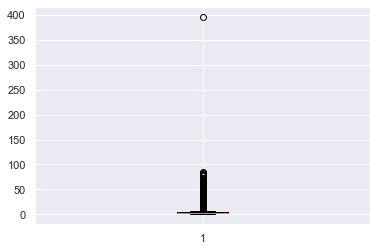

In [148]:
ax = plt.boxplot(x=dfA["latency_ms"])


### Create Flowchart

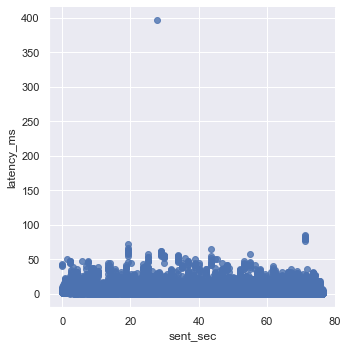

In [149]:
sns.lmplot(x='sent_sec', y='latency_ms', data=dfA, fit_reg=False)